In [1]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

pd.set_option("display.max_columns", None)
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
path_csv = "../data/BGR/data_horizons.csv"
path_csv_annotator_ids = '../data/BGR/Kartierer_ID.csv'
path_csv_locations = '../data/BGR/STANDORT.csv'
path_horizons_simple = '../data/BGR/Vereinfachung_Horizontsymbole.csv'
#path_pictures = "/Users/felix/Library/CloudStorage/Dropbox/data/BGR-Data-Bodenhorizonte/Profilbilder/"
path_pictures = "../data/BGR/Profilbilder_no_ruler/"

In [3]:
df = pd.read_csv(path_csv)
print(len(df.index))
df = df.dropna(subset=['Bodenart'])
print(len(df.index))
df#.head()

15207
15151


,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,Unnamed: 11,Bundesland,PointID,Unnamed: 14,profile,max_depth
0,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,NaN,SH,2.0,NaN,BB_0541.0,100.0
1,2.0,2.0,28.0,54.0,I; E,Sl2,10YR 3/3,3.0,C0,h2,Wf3,NaN,SH,3.0,NaN,BB_0600.0,90.0
2,2.0,3.0,54.0,68.0,II; Bv,Sl2,7.5YR 4/3,10.0,C0,h1,Wf3,NaN,SH,4.0,NaN,BB_0601.0,100.0
3,2.0,4.0,68.0,96.0,III; Bv-ilCv,fSms,7.5YR 6/4,1.0,C0,h0,Wf2,NaN,SH,5.0,NaN,BB_0659.0,100.0
4,2.0,5.0,96.0,201.0,III; ilCv,mSfs,10YR 7/4,1.0,C0,h0,NaN,NaN,SH,6.0,NaN,BB_0660.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15201,6211.0,3.0,27.0,50.0,I; Bbh+Bs,fSms,5YR 3/2,1.0,C0,h2,Wf3,NaN,NaN,NaN,NaN,NaN,NaN
15202,6211.0,4.0,50.0,70.0,I; Bbs+Bs,fSms,5YR 4/3,1.0,C0,h1,Wf2,NaN,NaN,NaN,NaN,NaN,NaN
15203,6211.0,5.0,70.0,100.0,I; Go-Bbs,fSms,7.5YR 5/4,1.0,C0,h1,Wf6,NaN,NaN,NaN,NaN,NaN,NaN
15204,6211.0,6.0,100.0,130.0,I; Go,fSms,2.5Y 6/4,1.0,C0,h0,Wf4,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
image_dataset = os.listdir(path_pictures)
img_files = pd.DataFrame(image_dataset, columns=['file'])
img_files['Point'] = img_files['file'].str.split("_").map(lambda x: x[1]).astype(float)
img_files.head()

,file,Point
0,BB_0896_Y_1.JPG,896.0
1,BB_0903_Y_1.JPG,903.0
2,BW_4930_Y_1.JPG,4930.0
3,BW_5183_Y_1.JPG,5183.0
4,BW_5462_Y_1.JPG,5462.0


In [9]:
df = pd.merge(df, img_files, how='inner', on='Point')
df['file'] = df['file'].map(lambda x: os.path.join(path_pictures, x))
df.head()

,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,Unnamed: 11,Bundesland,PointID,Unnamed: 14,profile,max_depth,file
0,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,NaN,SH,2.0,NaN,BB_0541.0,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG
1,2.0,2.0,28.0,54.0,I; E,Sl2,10YR 3/3,3.0,C0,h2,Wf3,NaN,SH,3.0,NaN,BB_0600.0,90.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG
2,2.0,3.0,54.0,68.0,II; Bv,Sl2,7.5YR 4/3,10.0,C0,h1,Wf3,NaN,SH,4.0,NaN,BB_0601.0,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG
3,2.0,4.0,68.0,96.0,III; Bv-ilCv,fSms,7.5YR 6/4,1.0,C0,h0,Wf2,NaN,SH,5.0,NaN,BB_0659.0,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG
4,2.0,5.0,96.0,201.0,III; ilCv,mSfs,10YR 7/4,1.0,C0,h0,NaN,NaN,SH,6.0,NaN,BB_0660.0,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG


In [10]:
df_k = pd.read_csv(path_csv_annotator_ids)
df_k = df_k.rename({'PointID':'Point'},axis=1)
df_k.head()

,Point,Aufnehmer
0,2,Kart8
1,3,Kart8
2,4,Kart10
3,5,Kart8
4,6,Kart8


In [11]:
df_loc = pd.read_csv(path_csv_locations, encoding='unicode_escape')
df_loc = df_loc.rename({'PointID':'Point'},axis=1)
df_loc.head()

,Point,Bundesland,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,BodenVarTypSub,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
0,2,SH,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,>200,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19
1,3,SH,6,2016,480546.9384,6079739.216,Marsch - Nord,G,0,MD,MDn,GWS4,135,0.0,0.0,N0,NaN,GG,TSF,Z,71.62,59.74
2,4,SH,8,2018,484922.3074,6080011.471,Marsch - Nord,A,0,MK,MKn,GWS4,105,0.0,0.0,N1,NE,GG,TH,Z,65.60,120.40
3,5,SH,10,2015,497355.9905,6079646.589,Marsch - Nord,G,0,RQ,p2RQ/GG-PP,GWS4,180,0.0,0.0,N0.2,SS,GG,KSF,K,88.82,220.87
4,6,SH,10,2015,505020.3377,6080401.37,Geest - Nord,G,0,YU,aGGe-YU,GWS4,140,0.0,0.0,N0,NaN,GG,TSF,Z,62.97,84.35


In [12]:
df = pd.merge(df, df_k, how='inner', on='Point')

In [13]:
df_loc['Point'] = pd.to_numeric(df['Point'])
df = pd.merge(df, df_loc, how='inner', on='Point')

In [14]:
df[df['ycoord']=='N0'] # invalid ycoord?

,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,Unnamed: 11,Bundesland_x,PointID,Unnamed: 14,profile,max_depth,file,Aufnehmer,Bundesland_y,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,BodenVarTypSub,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
709,24.0,1.0,0.0,32.0,I; Ap,Sl4,10YR 3/3,5.0,C0,h3,Wf3,NaN,SH,155.0,NaN,BB_1319.0,100.0,../data/BGR/Profilbilder_no_ruler/SH_0024_Y_1.JPG,Kart8,GWS3,120,0,0.0,N0,NaN,GG,TS,Z,159.95,118.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
714,24.0,2.0,32.0,50.0,I; Al-Sw,Ls4,2.5Y 5/4,5.0,C0,h1,Wf2,NaN,SH,156.0,NaN,BB_1327.0,80.0,../data/BGR/Profilbilder_no_ruler/SH_0024_Y_1.JPG,Kart8,GWS3,120,0,0.0,N0,NaN,GG,TS,Z,159.95,118.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,24.0,3.0,50.0,73.0,II; Bt-Sd,Ls3,10YR 4/4,4.0,C0,h0,Wf1,NaN,SH,158.0,NaN,BB_1329.0,100.0,../data/BGR/Profilbilder_no_ruler/SH_0024_Y_1.JPG,Kart8,GWS3,120,0,0.0,N0,NaN,GG,TS,Z,159.95,118.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,24.0,4.0,73.0,152.0,II; Sd,Ls3,2.5Y 5/4,4.0,C0,h0,NaN,NaN,SH,160.0,NaN,BB_1331.0,100.0,../data/BGR/Profilbilder_no_ruler/SH_0024_Y_1.JPG,Kart8,GWS3,120,0,0.0,N0,NaN,GG,TS,Z,159.95,118.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,24.0,5.0,152.0,201.0,III; lCv,Ls3,2.5Y 6/3,3.0,C3.4,h0,NaN,NaN,SH,161.0,NaN,BB_1333.0,90.0,../data/BGR/Profilbilder_no_ruler/SH_0024_Y_1.JPG,Kart8,GWS3,120,0,0.0,N0,NaN,GG,TS,Z,159.95,118.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4105,172.0,1.0,0.0,33.0,I; Ap,Sl2,10YR 3/2,3.0,C0,h3,Wf4,NaN,ST,1183.0,NaN,BY_4419.0,100.0,../data/BGR/Profilbilder_no_ruler/MV_0172_Y_1.JPG,Kart8,GWS4,110,42,24.0,N0,NaN,GG,TS,Z,251.99,84.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4109,172.0,2.0,33.0,53.0,I; Sw,Sl2,10YR 5/4,3.0,C0,h0,Wf2,NaN,ST,1185.0,NaN,BY_4425.0,100.0,../data/BGR/Profilbilder_no_ruler/MV_0172_Y_1.JPG,Kart8,GWS4,110,42,24.0,N0,NaN,GG,TS,Z,251.99,84.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4113,172.0,3.0,53.0,120.0,I; Swd,Sl3,2.5Y 5/4,3.0,C0,h0,NaN,NaN,BB,1186.0,NaN,BY_4427.0,100.0,../data/BGR/Profilbilder_no_ruler/MV_0172_Y_1.JPG,Kart8,GWS4,110,42,24.0,N0,NaN,GG,TS,Z,251.99,84.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4117,172.0,4.0,120.0,201.0,II; eSd,Sl4,2.5Y 5/4,3.0,C3.3,h0,NaN,NaN,BB,1187.0,NaN,BY_4428.0,70.0,../data/BGR/Profilbilder_no_ruler/MV_0172_Y_1.JPG,Kart8,GWS4,110,42,24.0,N0,NaN,GG,TS,Z,251.99,84.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
keep_columns = ['Point',
                'HorizontID',
                'Obergrenze',
                'Untergrenze',
                'Horizontsymbol',
                'Bodenart',
                'Bodenfarbe',
                'Steine',
                'Karbonat',
                'Humusgehaltsklasse',
                'Durchwurzelung',
                'max_depth',
                'file',
                'Aufnehmer',
                'Probenahme_Monat',
                'Probenahme_Jahr',
                'xcoord',
                'ycoord',
                'Bodenklimaraum_Name',
                'Landnutzung',
                'BZE_Moor',
                'Hauptbodentyp',
                'BodenVarTypSub',
                'GrundwaStufe',
                'GrundwaStand',
                'Moormaechtigkeit',
                'Torfmaechtigkeit',
                'Neigung',
                'Exposition',
                'Woelbung',
                'Reliefformtyp',
                'LageImRelief',
                'KV_0_30',
                'KV_30_100']

df = df[keep_columns]

df['GrundwaStand'] = df['GrundwaStand'].str.replace('>','').astype(float)
#df['xcoord'] = df['xcoord'].str.replace(',','.').astype(float)
#df['ycoord'] = df['ycoord'].str.replace(',','.').astype(float)
df['ycoord'] = df['ycoord'].str.replace('N0','0').astype(float)
#df['KV_0_30'] = df['KV_0_30'].str.replace(',','.').astype(float)
#df['KV_30_100'] = df['KV_30_100'].str.replace(',','.').astype(float)

df

,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,max_depth,file,Aufnehmer,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,BodenVarTypSub,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
0,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0.0,0.0,N0,NaN,GG,V,Z,81.89,54.19
1,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,6,2016,480546.9384,6079739.216,Marsch - Nord,G,0,MD,MDn,GWS4,135.0,0.0,0.0,N0,NaN,GG,TSF,Z,71.62,59.74
2,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,8,2018,484922.3074,6080011.471,Marsch - Nord,A,0,MK,MKn,GWS4,105.0,0.0,0.0,N1,NE,GG,TH,Z,65.60,120.40
3,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,10,2015,497355.9905,6079646.589,Marsch - Nord,G,0,RQ,p2RQ/GG-PP,GWS4,180.0,0.0,0.0,N0.2,SS,GG,KSF,K,88.82,220.87
4,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,10,2015,505020.3377,6080401.370,Geest - Nord,G,0,YU,aGGe-YU,GWS4,140.0,0.0,0.0,N0,NaN,GG,TSF,Z,62.97,84.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17601,1061.0,1.0,0.0,30.0,I; aAp,Lts,10YR 3/2,0.0,C1,h3,Wf5,NaN,../data/BGR/Profilbilder_no_ruler/ST_1061_Y_1.JPG,Kart7,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72
17602,1061.0,2.0,30.0,68.0,I; aM-Gro,Tu2,10YR 2/2,0.0,C1,h2,Wf4,NaN,../data/BGR/Profilbilder_no_ruler/ST_1061_Y_1.JPG,Kart7,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72
17603,1061.0,3.0,68.0,82.0,II; aM-Gor,Lts,7.5YR 2.5/1,0.0,C0,h1,Wf3,NaN,../data/BGR/Profilbilder_no_ruler/ST_1061_Y_1.JPG,Kart7,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72
17604,1061.0,4.0,82.0,134.0,III; aGor,Sl2,7.5YR 4/6,0.0,C0,h0,Wf1,NaN,../data/BGR/Profilbilder_no_ruler/ST_1061_Y_1.JPG,Kart7,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0.0,0.0,N0,NaN,GG,TSF,T,117.59,87.72


In [12]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df.drop('file', axis=1), title="Profiling Report")
#profile.to_file("./BGR/bgr_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
min_labels = 10
label = 'Bodenart'
feature_columns = ['xcoord','ycoord'
                   #'Horizontsymbol', 'Bodenfarbe', 'Steine',
                   #'Karbonat', 'Humusgehaltsklasse', 'Durchwurzelung', 'Probenahme_Monat', 'Probenahme_Jahr', 'Bodenklimaraum_Name',
                   #'Landnutzung', 'BZE_Moor', 'Hauptbodentyp', 'BodenVarTypSub', 'GrundwaStufe',
                   #'GrundwaStand', 'Moormaechtigkeit', 'Torfmaechtigkeit', 'Neigung', 'Exposition',
                   #'Woelbung', 'Reliefformtyp', 'LageImRelief', 'KV_0_30', 'KV_30_100'
                   ]

vision_backbone = 'WinKawaks/vit-small-patch16-224'

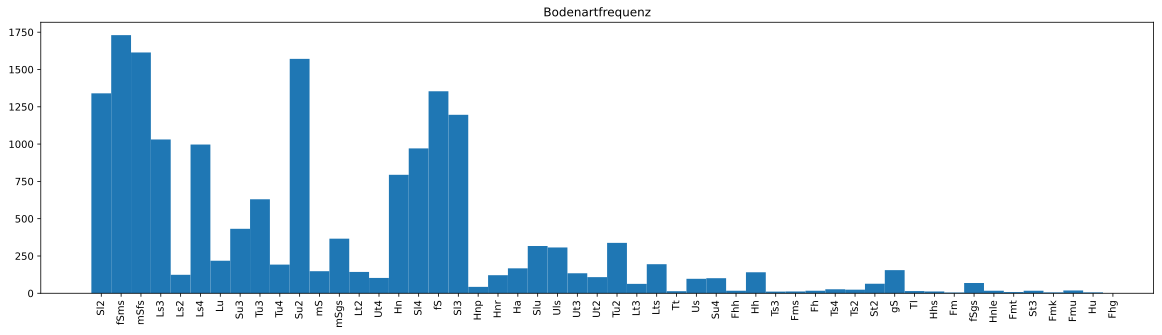

In [18]:
counts = df[label].value_counts()
plt.figure(figsize=(20, 5))
plt.hist(df[label], bins = np.arange(len(counts))-0.5)
plt.title('Bodenartfrequenz')
plt.xticks(rotation='vertical')
plt.show()

In [34]:
counts[counts<min_labels] = np.nan
df[label] = df[label].replace(counts.index, range(len(counts))) # one-hot encode label vector for Bodenart
df = df.dropna(subset= feature_columns + [label])
df[label] = df[label].astype(int)
df.head()

,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,max_depth,file,Aufnehmer,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,BodenVarTypSub,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
2,2.0,1.0,0.0,28.0,I; Ap,4,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,8,2018,484922.3074,6080011.471,Marsch - Nord,A,0,MK,MKn,GWS4,105.0,0.0,0.0,N1,NE,GG,TH,Z,65.60,120.40
3,2.0,1.0,0.0,28.0,I; Ap,4,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,10,2015,497355.9905,6079646.589,Marsch - Nord,G,0,RQ,p2RQ/GG-PP,GWS4,180.0,0.0,0.0,N0.2,SS,GG,KSF,K,88.82,220.87
7,2.0,2.0,28.0,54.0,I; E,4,10YR 3/3,3.0,C0,h2,Wf3,90.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,8,2018,484922.3074,6080011.471,Marsch - Nord,A,0,MK,MKn,GWS4,105.0,0.0,0.0,N1,NE,GG,TH,Z,65.60,120.40
8,2.0,2.0,28.0,54.0,I; E,4,10YR 3/3,3.0,C0,h2,Wf3,90.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,10,2015,497355.9905,6079646.589,Marsch - Nord,G,0,RQ,p2RQ/GG-PP,GWS4,180.0,0.0,0.0,N0.2,SS,GG,KSF,K,88.82,220.87
12,2.0,3.0,54.0,68.0,II; Bv,4,7.5YR 4/3,10.0,C0,h1,Wf3,100.0,../data/BGR/Profilbilder_no_ruler/SH_0002_Y_1.JPG,Kart8,8,2018,484922.3074,6080011.471,Marsch - Nord,A,0,MK,MKn,GWS4,105.0,0.0,0.0,N1,NE,GG,TH,Z,65.60,120.40


In [20]:
# Definiere die Custom-Transformation für das Zuschneiden des Bildes
class CenterCropTransform:
    def __init__(self, crop_width=240, crop_height=450):
        self.crop_width = crop_width
        self.crop_height = crop_height

    def __call__(self, img):
        # Bildgröße ermitteln
        width, height = img.size
        
        # Berechne die Koordinaten für den zentrierten Ausschnitt
        left = (width - self.crop_width) // 2
        upper = (height - self.crop_height) // 2
        right = left + self.crop_width
        lower = upper + self.crop_height
        
        # Zuschnitt des Bildes
        return img.crop((left, upper, right, lower))

# Define the image transforms (resize, normalize, etc.)
transform = transforms.Compose([
    #CenterCropTransform(240, 450),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(224),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),          # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize with ImageNet statistics
])

# Custom Dataset class für Bilder, tabellarische Daten und Labels
class ImageTabularDataset(Dataset):
    def __init__(self, 
                 dataframe, 
                 transform=None, 
                 image_path=None, 
                 label=None,
                 feature_columns=None
                ):
        """
        dataframe: Pandas DataFrame mit Bildpfaden, tabellarischen Daten und Labels
        transform: Bildtransformationen
        """
        self.dataframe = dataframe
        self.transform = transform
        self.image_path = image_path
        self.label = label
        self.feature_columns = feature_columns

    def __len__(self):
        # Länge des Datasets (Anzahl der Zeilen im DataFrame)
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Extrahiere den Bildpfad aus dem DataFrame
        image_path = self.dataframe.iloc[idx][self.image_path]
        
        # Lade das Bild
        image = Image.open(image_path)
        
        # Wende Bildtransformationen an, falls vorhanden
        if self.transform:
            image = self.transform(image)
        
        # Extrahiere die tabellarischen Daten (numerische Features) aus dem DataFrame
        tabular_features_array = self.dataframe.iloc[idx][self.feature_columns].astype(float).values
        tabular_features = torch.tensor(tabular_features_array, dtype=torch.float32)
        
        # Extrahiere das Label
        label = torch.tensor(self.dataframe.iloc[idx][self.label], dtype=torch.long)  # Für Klassifikation (long)
        
        return image, tabular_features, label

In [21]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoFeatureExtractor

# Definiere das Modell mit DINOv2 Backbone von Hugging Face
class ImageTabularModel(nn.Module):
    def __init__(self, vision_backbone, num_tabular_features, num_classes):
        super(ImageTabularModel, self).__init__()
        
        # Lade das vortrainierte DINOv2-Modell von Hugging Face
        self.vision_backbone = AutoModel.from_pretrained(vision_backbone)
        self.feature_extractor = AutoFeatureExtractor.from_pretrained(vision_backbone)
        
        # Definiere ein MLP für die tabellarischen Daten
        self.fc_tabular = nn.Sequential(
            nn.Linear(num_tabular_features, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        
        # Kombinierte Fully Connected Layers
        self.fc_combined = nn.Sequential(
            # nn.Linear(768 + 16, 64),  # 768 ist die Ausgabegröße von DINOv2, 16 ist die Größe des MLP
            nn.Linear(384 + 16, 64),  # 768 ist die Ausgabegröße von DINOv2, 16 ist die Größe des MLP
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, image, tabular_features):
        # Extrahiere die Bildfeatures
        image_features = self.vision_backbone(pixel_values=image).last_hidden_state[:, 0, :]
        # import pdb;pdb.set_trace()
        
        # Verarbeite die tabellarischen Daten mit dem MLP
        tabular_features_processed = self.fc_tabular(tabular_features)
        
        # Kombiniere Bild- und Tabellarische Features
        combined_features = torch.cat((image_features, tabular_features_processed), dim=1)
        
        # Endgültige Vorhersage
        output = self.fc_combined(combined_features)
        return output

In [35]:
# Initialize model
model = ImageTabularModel(vision_backbone=vision_backbone,
                          num_tabular_features=len(feature_columns),
                          num_classes=len(df[label].unique()))

Some weights of the model checkpoint at WinKawaks/vit-small-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at WinKawaks/vit-small-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
from sklearn.model_selection import train_test_split
import torch.optim as optim

train_df, test_df = train_test_split(df)

print(f'{len(train_df)} samples for training.')
print(f'{len(test_df)}  samples for testing.')

4134 samples for training.
1379  samples for testing.


In [39]:
# Erstelle das Dataset mit DataFrame, Bildern und tabellarischen Daten
dataset = ImageTabularDataset(dataframe=train_df[:100],
                              transform=transform,
                              image_path='file',
                              label=label,
                              feature_columns=feature_columns
                             )

# Erstelle den DataLoader
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Beispiel: Definiere einen Optimizer und eine Loss-Funktion
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

In [40]:
model.train()
for epoch in range(10):
    optimizer.zero_grad()
    # Schleife durch den DataLoader (Training oder Evaluierung)
    for batch in dataloader:
        images, tabular_features, labels = batch
        outputs = model(image=images, tabular_features=tabular_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 52879.796875
Epoch 1, Loss: 48008.29296875
Epoch 2, Loss: 61468.25
Epoch 3, Loss: 32833.3828125
Epoch 4, Loss: 36750.13671875
Epoch 5, Loss: 16445.220703125
Epoch 6, Loss: 26017.71484375
Epoch 7, Loss: 17478.9609375
Epoch 8, Loss: 29909.837890625
Epoch 9, Loss: 19982.88671875


In [41]:
test_dataset = ImageTabularDataset(dataframe=test_df, 
                              transform=transform,
                              image_path='file',
                              label=label,
                              feature_columns=feature_columns
                             )

# Erstelle den DataLoader
dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
model.eval()  # Setze das Modell in den Evaluierungsmodus
with torch.no_grad():
    outputs = []
    for batch in dataloader:
        images, tabular_features, labels = batch
        outputs.append(model(image=images, tabular_features=tabular_features))

In [42]:
outputs

[tensor([[ 11679.9502,   1358.1737,  13109.3428,  ...,   6043.6987,
            3918.0649, -10658.8750],
         [ 11635.9141,   2092.0459,  13207.2705,  ...,   4403.4727,
            3259.0884,  -9129.1973],
         [ 11093.4648,   2015.2021,  12598.4609,  ...,   4145.6338,
            3083.4915,  -8653.8643],
         ...,
         [ 11955.9375,   1436.0367,  13430.8584,  ...,   6087.6929,
            3981.8157, -10835.8652],
         [ 11065.5664,   1874.9535,  12564.4873,  ...,   4430.7368,
            3228.8806,  -8941.3633],
         [ 11857.5254,   2203.5298,  13482.1230,  ...,   4305.4297,
            3239.2307,  -9130.3037]]),
 tensor([[ 12041.9570,   2144.6687,  13665.5137,  ...,   4604.6670,
            3395.8713,  -9495.4824],
         [ 12357.0049,   1498.5400,  13884.8828,  ...,   6261.0264,
            4106.4932, -11175.7314],
         [ 11306.8955,   1807.6925,  12846.5576,  ...,   4752.9775,
            3421.5701,  -9380.1797],
         ...,
         [ 11234.7695,   

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert outputs to predicted labels (adjust based on your model's output format)
predicted_labels = []
for output in outputs:
    # Apply threshold or use appropriate function to get predicted labels
    predicted_labels.extend(torch.argmax(output, dim=1).tolist())

# Convert true labels to a list
true_labels = [label.item() for batch in dataloader for label in batch[2]]

# Calculate metrics
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       113
           1       0.00      0.00      0.00       117
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00       144
           5       0.00      0.00      0.00       116
           6       0.00      0.00      0.00        85
           7       0.00      0.00      0.00        71
           8       0.00      0.00      0.00        80
           9       0.04      1.00      0.08        55
          10       0.00      0.00      0.00        50
          11       0.00      0.00      0.00        37
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        22
          17       0.00    

/home/tchiaburu/anaconda3/envs/torch_gpu_sam/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tchiaburu/anaconda3/envs/torch_gpu_sam/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tchiaburu/anaconda3/envs/torch_gpu_sam/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

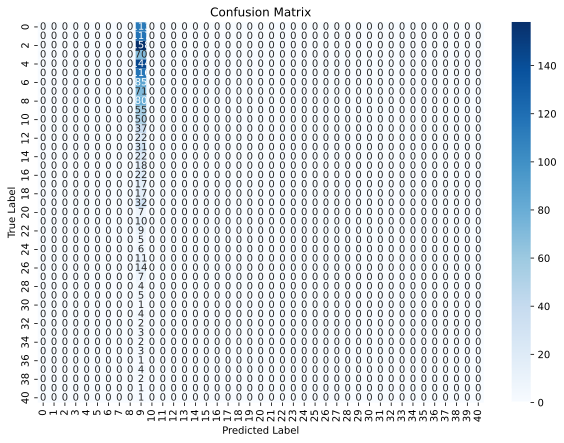

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# TODO
from transformers import TrainingArguments, Trainer

# Define training arguments
training_args = TrainingArguments(
    output_dir="./testtest",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy="epoch",
    num_train_epochs=53,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=1000,
    learning_rate=5e-5,
    weight_decay=0.01,
    report_to="none",  # Set to "wandb" or other service if tracking experiments
)

# Initialize the Trainer with the model, data, and training arguments
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=collate_fn,
)

# Train the model
trainer.train()

In [ ]:
# Evaluate the model on the test dataset
eval_results = trainer.evaluate()
print(f"Test Accuracy: {eval_results['eval_accuracy']}")